In [47]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [48]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plotc
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

            recovered
Date                 
2021-03-07      305.0
2021-03-07    10148.0
2021-03-07     5319.0
2021-03-07     1233.0
2021-03-07    16328.0


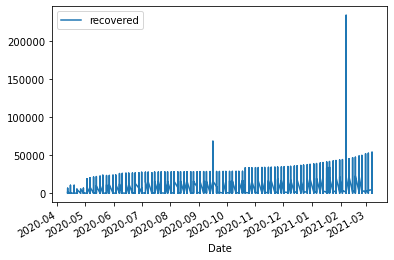

In [49]:
# load dataset
covid = read_csv('date_state.csv',
                       index_col ='Date',
                       parse_dates = True)
 

print(covid.head())
covid.plot()
pyplot.show()

In [50]:
from pmdarima import auto_arima

In [55]:
# fit model
model = ARIMA(covid, order=(5,1,0))
model_fit = model.fit()

In [56]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              recovered   No. Observations:                 5320
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -55067.188
Date:                Thu, 31 Mar 2022   AIC                         110146.376
Time:                        17:44:06   BIC                         110185.850
Sample:                             0   HQIC                        110160.168
                               - 5320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8148      0.007   -124.881      0.000      -0.828      -0.802
ar.L2         -0.7459      0.008    -97.523      0.000      -0.761      -0.731
ar.L3         -0.5328      0.007    -76.355      0.0

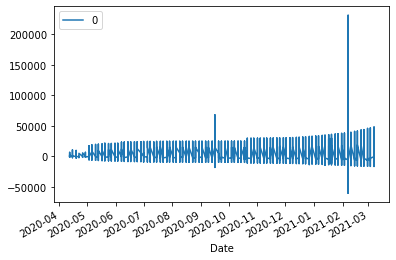

In [57]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

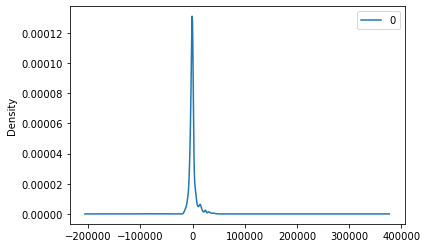

In [58]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [59]:
# summary stats of residuals
print(residuals.describe())

                   0
count    5310.000000
mean       -2.492258
std      7733.981726
min    -60660.916060
25%     -2878.444516
50%      -787.971536
75%       584.180277
max    231008.803013


In [60]:
# split into train and test sets
X = covid.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [64]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1317.587007, expected=550.000000
predicted=1010.046077, expected=326.000000
predicted=1425.654538, expected=7209.000000
predicted=2427.174422, expected=230.000000
predicted=1515.107303, expected=1007.000000
predicted=2742.468495, expected=1777.000000
predicted=1925.744142, expected=135.000000
predicted=1453.043044, expected=1073.000000
predicted=2396.113556, expected=6837.000000
predicted=1903.397732, expected=311.000000
predicted=1251.042878, expected=2218.000000
predicted=2404.059372, expected=8.000000
predicted=1635.868070, expected=57.000000
predicted=1683.333154, expected=1592.000000
predicted=2286.061752, expected=955.000000
predicted=679.644301, expected=117.000000
predicted=914.479250, expected=27.000000
predicted=499.993708, expected=22.000000
predicted=432.869294, expected=1538.000000
predicted=806.478603, expected=434.000000
predicted=431.077914, expected=534.000000
predicted=469.580330, expected=3454.000000
predicted=1062.463071, expected=8715.000000
predicted=228

predicted=2137.456852, expected=1615.000000
predicted=1947.078387, expected=4396.000000
predicted=3276.266798, expected=578.000000
predicted=2794.057802, expected=523.000000
predicted=2976.751976, expected=5091.000000
predicted=3842.012235, expected=3173.000000
predicted=2124.863967, expected=5.000000
predicted=2399.026015, expected=24.000000
predicted=1766.689303, expected=793.000000
predicted=1539.409270, expected=119.000000
predicted=1651.294730, expected=7488.000000
predicted=2287.249367, expected=2822.000000
predicted=1230.856736, expected=299.000000
predicted=1891.015498, expected=670.000000
predicted=2266.800805, expected=3543.000000
predicted=2333.838930, expected=8431.000000
predicted=4077.453623, expected=3377.000000
predicted=2730.271150, expected=114.000000
predicted=2750.815560, expected=6366.000000
predicted=4047.433540, expected=1581.000000
predicted=3322.823059, expected=1129.000000
predicted=3960.581854, expected=2.000000
predicted=2322.581121, expected=1355.000000
pre

predicted=1589.088627, expected=23.000000
predicted=1869.512118, expected=1441.000000
predicted=992.112863, expected=78.000000
predicted=568.359287, expected=282.000000
predicted=517.230230, expected=386.000000
predicted=636.777816, expected=15423.000000
predicted=3189.152677, expected=527.000000
predicted=1634.947419, expected=553.000000
predicted=3400.609254, expected=27867.000000
predicted=8290.301943, expected=2991.000000
predicted=4890.449980, expected=407.000000
predicted=9565.159821, expected=224.000000
predicted=5963.897656, expected=6812.000000
predicted=5831.217018, expected=159.000000
predicted=7185.133333, expected=971.000000
predicted=2338.990614, expected=884.000000
predicted=1632.223213, expected=98.000000
predicted=1280.678016, expected=685.000000
predicted=2016.021942, expected=2813.000000
predicted=922.725461, expected=201.000000
predicted=725.298081, expected=1905.000000
predicted=1278.293171, expected=6.000000
predicted=804.115645, expected=56.000000
predicted=969.1

predicted=1113.544674, expected=777.000000
predicted=518.947442, expected=93.000000
predicted=731.548996, expected=20.000000
predicted=420.372922, expected=12.000000
predicted=354.941920, expected=891.000000
predicted=579.684077, expected=240.000000
predicted=295.036753, expected=nan
predicted=281.018160, expected=1463.000000
predicted=527.463143, expected=5632.000000
predicted=1494.469813, expected=1667.000000
predicted=1392.426863, expected=4287.000000
predicted=2583.805476, expected=541.000000
predicted=2218.876181, expected=505.000000
predicted=2404.746407, expected=3281.000000
predicted=3003.161116, expected=2698.000000
predicted=1878.344033, expected=5.000000
predicted=1968.793154, expected=17.000000
predicted=1350.443902, expected=693.000000
predicted=1181.196104, expected=90.000000
predicted=1151.038665, expected=6770.000000
predicted=2006.194326, expected=2386.000000
predicted=1063.464691, expected=261.000000
predicted=1726.535123, expected=538.000000
predicted=2019.052759, ex

predicted=1928.391209, expected=7624.000000
predicted=3446.274259, expected=2939.000000
predicted=2311.596714, expected=100.000000
predicted=2487.973508, expected=6016.000000
predicted=3661.959427, expected=1298.000000
predicted=2900.838170, expected=879.000000
predicted=3577.495639, expected=2.000000
predicted=2093.270192, expected=891.000000
predicted=1421.831494, expected=0.000000
predicted=1703.863369, expected=1109.000000
predicted=792.805782, expected=74.000000
predicted=445.508356, expected=216.000000
predicted=397.321562, expected=320.000000
predicted=487.836884, expected=12625.000000
predicted=2580.330542, expected=435.000000
predicted=1307.527401, expected=464.000000
predicted=2855.654014, expected=26442.000000
predicted=7458.851564, expected=2557.000000
predicted=4241.103223, expected=359.000000
predicted=8671.134922, expected=176.000000
predicted=5630.971469, expected=6215.000000
predicted=5382.088633, expected=147.000000
predicted=6635.969014, expected=833.000000
predicted

KeyboardInterrupt: 

In [67]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

NameError: name 'sqrt' is not defined

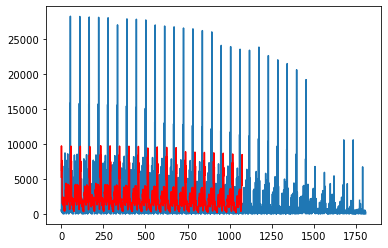

In [66]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()